<a href="https://colab.research.google.com/github/LucyMariel/Lucy/blob/master/Copy_of_DIVICHousingPriceForecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Practice solving regression problems using the house price data set in Ames, Iowa, used in Week3.

By using 79 types of features (explanatory variables), you can set the problem of guessing the numerical value of housing prices. This kind of problem to guess continuous values is called a regression problem.

Link: House Prices: Advanced Regression Techniques.

We will use scikit-learn to train and estimate the following methods. We will not go into the details of each method at this stage. We will simply see that all of them can be easily used with the library, and that there are differences in the results of each method.

Linear regression
SVM
Decision tree
Random forest
There are some methods that can be used for both classification and regression problems, and others that cannot.

This dataset has 79 different features (objective variables), and as we saw in Week 3, it contains many different types of data. How to pre-process this is an important part of machine learning, but in this case, we will use only two explanatory variables (features), GrLivArea and YearBuilt, in order to prioritize the practice of learning and evaluation of regression problems.



**[Problem 1] Feature selection for practice**

After reading the dataset, extract the explanatory variables GrLivArea and YearBuilt, and the objective variable SalePrice, respectively.

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
# First extract the columns and create a new dataset
# Select the desired columns
selected_columns = ['GrLivArea', 'YearBuilt', 'SalePrice']
new_df = df[selected_columns]

# Display the first few rows of the new DataFrame to confirm
print(new_df.head())

   GrLivArea  YearBuilt  SalePrice
0       1710       2003     208500
1       1262       1976     181500
2       1786       2001     223500
3       1717       1915     140000
4       2198       2000     250000


In [ ]:
new_df

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


In [ ]:
# Now, the columns become array
import numpy as np

# new_df is already created
X = new_df[['GrLivArea', 'YearBuilt']].values  # Features as a NumPy array
y = new_df['SalePrice'].values  # Target variable as a NumPy array

# Display the arrays to confirm
print("Feature array (X):\n", X[:5])  # Display first 5 rows
print("\nTarget array (y):\n", y[:5])  # Display first 5 rows

Feature array (X):
 [[1710 2003]
 [1262 1976]
 [1786 2001]
 [1717 1915]
 [2198 2000]]

Target array (y):
 [208500 181500 223500 140000 250000]


In [ ]:
# Row number
num_filas = len(X)

# Column number
num_columnas = max(len(fila) for fila in X)

print(f"Número de filas: {num_filas}")
print(f"Número máximo de columnas: {num_columnas}")

Número de filas: 1460
Número máximo de columnas: 2


**[Problem 2] Estimation and evaluation by linear regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 2314465092.7320137
Root Mean Squared Error (RMSE): 48108.88787669087
R-squared (R2): 0.6696127072424974


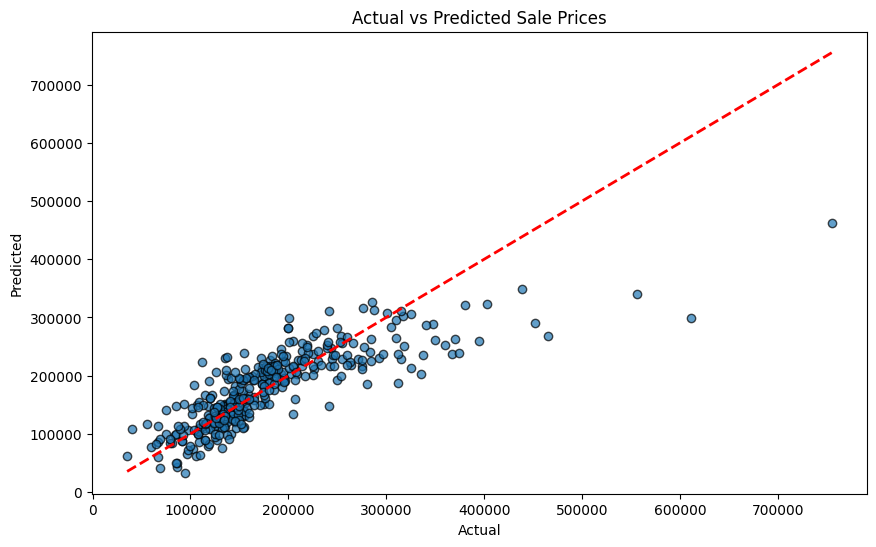

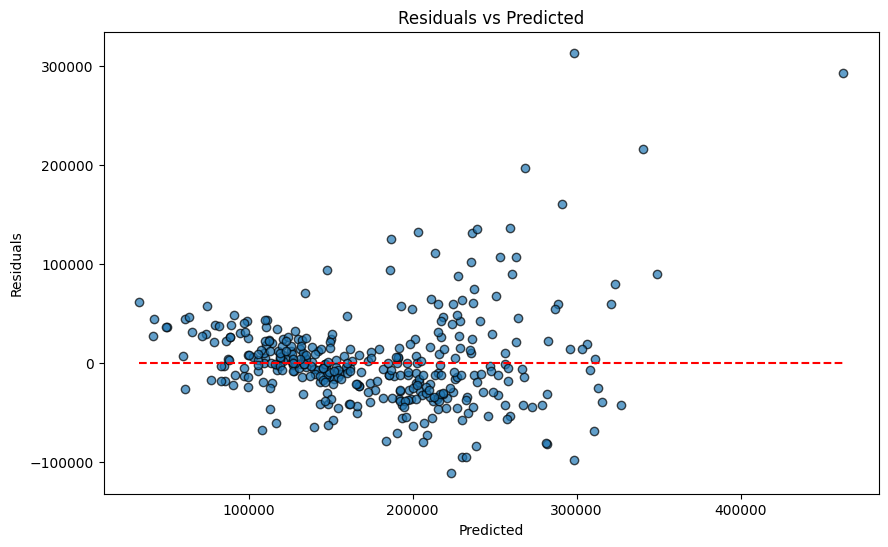

In [ ]:
# Plot the true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Sale Prices')
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, edgecolor='k', alpha=0.7)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

Analysis without standarization

In [ ]:
# Split the data into training and testing sets without scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create the Linear Regression model
model_no_scaling = LinearRegression()

# Train the model
model_no_scaling.fit(X_train, y_train)

# Make predictions on the test set
y_pred_no_scaling = model_no_scaling.predict(X_test)

# Calculate evaluation metrics
mse_no_scaling = mean_squared_error(y_test, y_pred_no_scaling)
rmse_no_scaling = np.sqrt(mse_no_scaling)
r2_no_scaling = r2_score(y_test, y_pred_no_scaling)

print("Mean Squared Error (MSE) without scaling:", mse_no_scaling)
print("Root Mean Squared Error (RMSE) without scaling:", rmse_no_scaling)
print("R-squared (R2) without scaling:", r2_no_scaling)

Mean Squared Error (MSE) without scaling: 2314465092.732015
Root Mean Squared Error (RMSE) without scaling: 48108.88787669088
R-squared (R2) without scaling: 0.6696127072424973


The "index value" in this context refers to the evaluation metrics used to assess the performance of the Linear Regression model. Specifically, the metrics calculated here are:

Mean Squared Error (MSE): 2314465092.7320137

Root Mean Squared Error (RMSE): 48108.88787669087

R-squared (R2): 0.6696127072424974



**[Problem 3] Comparison of methods**

learn, estimate, evaluate and visualize all of the following methods

SMV

Mean Squared Error (MSE): 7169223057.829623
Root Mean Squared Error (RMSE): 84671.26465235784
R-squared (R2): -0.023398540202243634


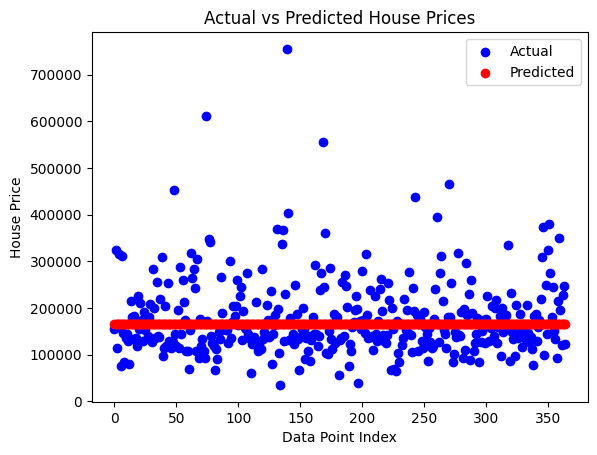

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
X = new_df[['GrLivArea', 'YearBuilt']].values  # Features as a NumPy array
y = new_df['SalePrice'].values  # Target variable as a NumPy array
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the SVM model
svr = SVR()

# Train the model
svr.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svr.predict(X_test_scaled)

# Calculate evaluation metrics
mse_svm = mean_squared_error(y_test, y_pred)
rmse_svm = np.sqrt(mse_svm)
r2_svm = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse_svm)
print("Root Mean Squared Error (RMSE):", rmse_svm)
print("R-squared (R2):", r2_svm)

# Visualization
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.xlabel('Data Point Index')
plt.ylabel('House Price')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()


Decision Tree

Mean Squared Error (MSE): 2299761869.3461947
Root Mean Squared Error (RMSE): 47955.8324851753
R-squared (R2): 0.6717115758685589


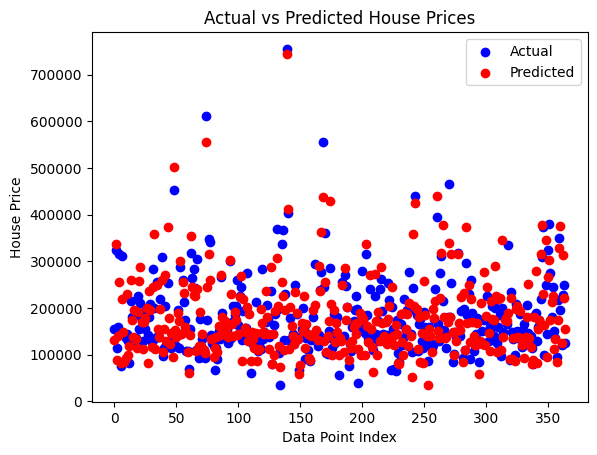

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Define the data
X = new_df[['GrLivArea', 'YearBuilt']].values  # Features as a NumPy array
y = new_df['SalePrice'].values  # Target variable as a NumPy array

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Decision Tree Regression model
dtr = DecisionTreeRegressor(random_state=42)

# Train the model
dtr.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = dtr.predict(X_test_scaled)

# Calculate evaluation metrics
mse_dtr = mean_squared_error(y_test, y_pred)
rmse_dtr = np.sqrt(mse_dtr)
r2_dtr = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse_dtr)
print("Root Mean Squared Error (RMSE):", rmse_dtr)
print("R-squared (R2):", r2_dtr)

# Visualization
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.xlabel('Data Point Index')
plt.ylabel('House Price')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()

Random Forest

Mean Squared Error (MSE): 1623931779.5319643
Root Mean Squared Error (RMSE): 40298.03691908533
R-squared (R2): 0.7681855622073267


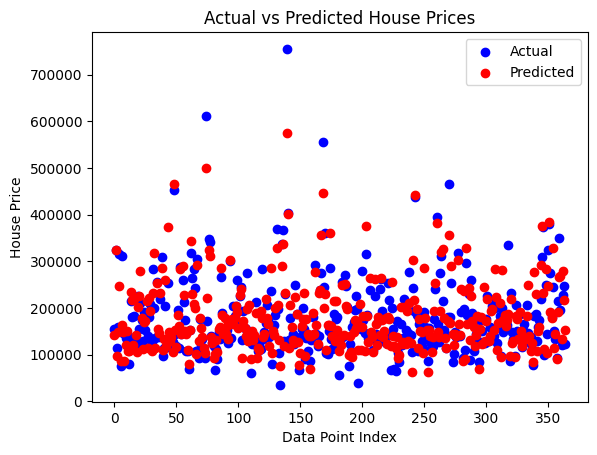

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Define the data
X = new_df[['GrLivArea', 'YearBuilt']].values  # Features as a NumPy array
y = new_df['SalePrice'].values  # Target variable as a NumPy array

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Random Forest Regression model
rfr = RandomForestRegressor(random_state=42)

# Train the model
rfr.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rfr = rfr.predict(X_test_scaled)

# Calculate evaluation metrics
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
rmse_rfr = np.sqrt(mse_rfr)
r2_rfr = r2_score(y_test, y_pred_rfr)

print("Mean Squared Error (MSE):", mse_rfr)
print("Root Mean Squared Error (RMSE):", rmse_rfr)
print("R-squared (R2):", r2_rfr)

# Visualization
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred_rfr)), y_pred_rfr, color='red', label='Predicted')
plt.xlabel('Data Point Index')
plt.ylabel('House Price')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()

**Comparison**

Linear Regression

Mean Squared Error (MSE): 2314465092.7320137

Root Mean Squared Error (RMSE): 48108.88787669087

R-squared (R2): 0.6696127072424974


SVM

Mean Squared Error (MSE): 7169223057.829623

Root Mean Squared Error (RMSE): 84671.26465235784

R-squared (R2): -0.023398540202243634

Decision Tree

Mean Squared Error (MSE): 2299761869.3461947

Root Mean Squared Error (RMSE): 47955.8324851753

R-squared (R2): 0.6717115758685589

Random Forest

Mean Squared Error (MSE): 1623931779.5319643

Root Mean Squared Error (RMSE): 40298.03691908533

R-squared (R2): 0.7681855622073267

MSE: Indicates the average squared difference between actual and predicted values. The lower the MSE, the better the model performance.

RMSE: Provides an error metric in the same units as the target variable. Lower RMSE indicates better model performance.

R2: Indicates the proportion of variance in the target variable explained by the model. An R² value close to 1 indicates a better fit.


**[Problem 4] (Advance assignment) Learning using other features**


   GrLivArea  YearBuilt  LotArea  SalePrice
0       1710       2003     8450     208500
1       1262       1976     9600     181500
2       1786       2001    11250     223500
3       1717       1915     9550     140000
4       2198       2000    14260     250000
Mean Squared Error (MSE): 1382504619.1366389
Root Mean Squared Error (RMSE): 37182.047000355415
R-squared (R2): 0.8026490182221194


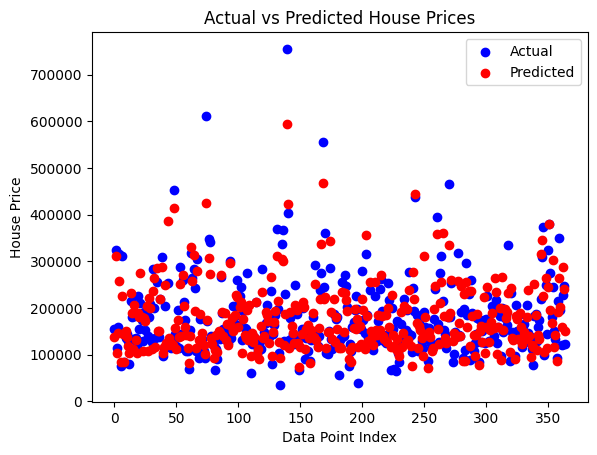

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# Select the desired columns
selected_columns = ['GrLivArea', 'YearBuilt', 'LotArea', 'SalePrice']
new_df = df[selected_columns]

# Display the first few rows of the new DataFrame to confirm
print(new_df.head())
# Define the data
X = new_df[['GrLivArea', 'YearBuilt', 'LotArea']].values  # Features as a NumPy array
y = new_df['SalePrice'].values  # Target variable as a NumPy array

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Random Forest Regression model
rfr = RandomForestRegressor(random_state=42)

# Train the model
rfr.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rfr = rfr.predict(X_test_scaled)

# Calculate evaluation metrics
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
rmse_rfr = np.sqrt(mse_rfr)
r2_rfr = r2_score(y_test, y_pred_rfr)

print("Mean Squared Error (MSE):", mse_rfr)
print("Root Mean Squared Error (RMSE):", rmse_rfr)
print("R-squared (R2):", r2_rfr)

# Visualization
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred_rfr)), y_pred_rfr, color='red', label='Predicted')
plt.xlabel('Data Point Index')
plt.ylabel('House Price')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()

Random Forest was selected, because the R2 value was higher 0.7681855622073267. It was added the variable LotArea impacting in R2 value, which rise to 0.8026490182221194